In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import fftpack, ndimage
plt.rcParams["animation.ffmpeg_path"] = r"/Users/JanviMadhani/Desktop/Ffmpeg/ffmpeg" #CHANGE to location of ffmpeg on your machine

Populating the interactive namespace from numpy and matplotlib


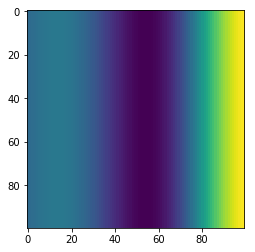

In [4]:
x = np.linspace(0,2*np.pi,100)
y = np.linspace(0,100,100)
xv,yv = np.meshgrid(x,y)

cos = np.cos(xv)*y

plt.imshow(cos)


## Animated Theoretical Shadowbands

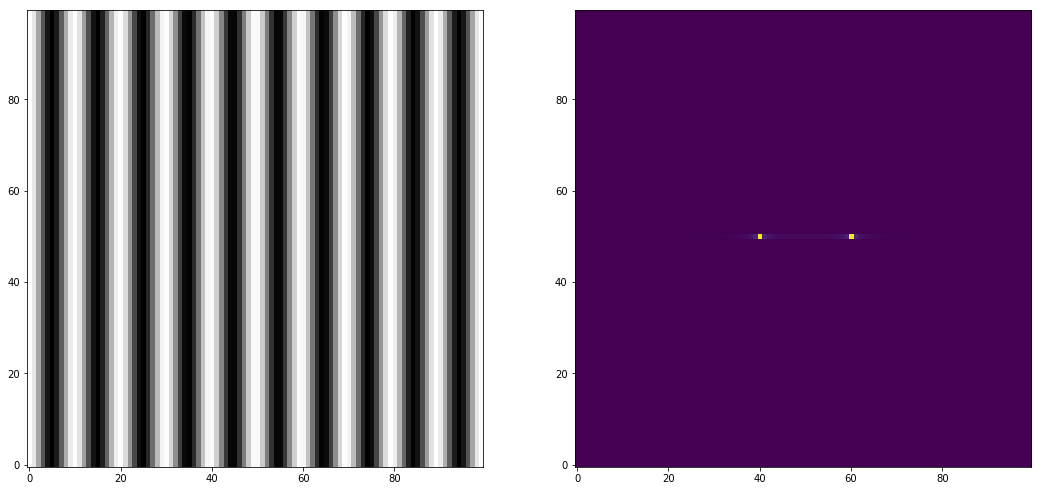

In [7]:
x_vals = np.linspace(0,2*np.pi,100) 
y_vals = 100

def f(x,y):
    return [[np.cos(10*x_val) for x_val in x] for y_val in range(y)] 



fig = plt.figure(figsize=(18,12))
plt.subplot(121)
im = plt.imshow(f(x_vals,y_vals),cmap="gray",origin="lower",animated=True)

plt.subplot(122)
a = np.fft.fftn(f(x_vals,y_vals))
a_ = np.fft.fftshift(a)
plt.imshow(abs(a_),origin="lower",animated=True)

def updatefig(*args):
    global x_vals, y_vals
    x_vals += np.pi / 15.
    im.set_array(f(x_vals, y_vals))
    return im,

anim = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
HTML(anim.to_html5_video())



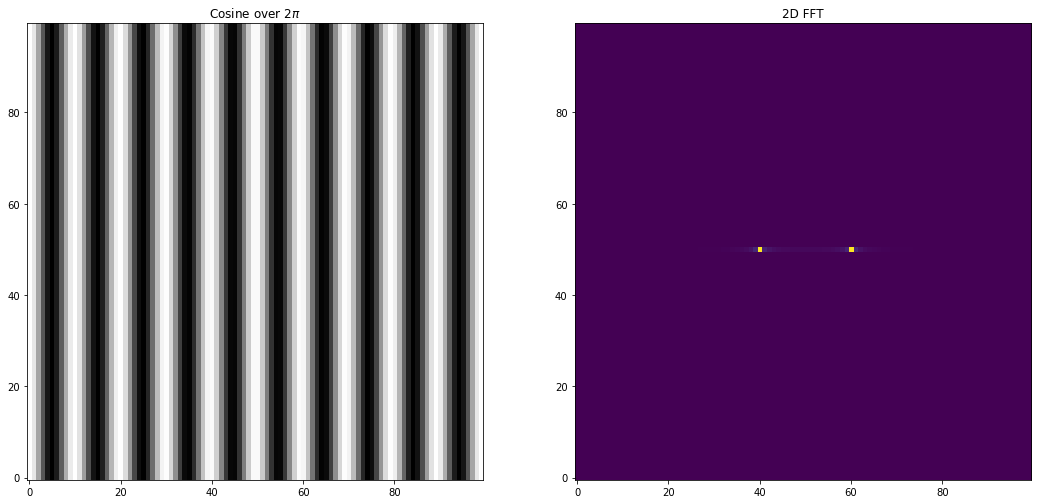

In [3]:
#STATIC IMAGE

plt.figure(figsize=(18,12))
plt.subplot(121)
plt.imshow(f(x_vals,y_vals),cmap="gray",origin="lower")
plt.title('Cosine over $2\pi$')

plt.subplot(122)
plt.imshow(abs(a_),origin="lower")
plt.title('2D FFT')


plt.show()

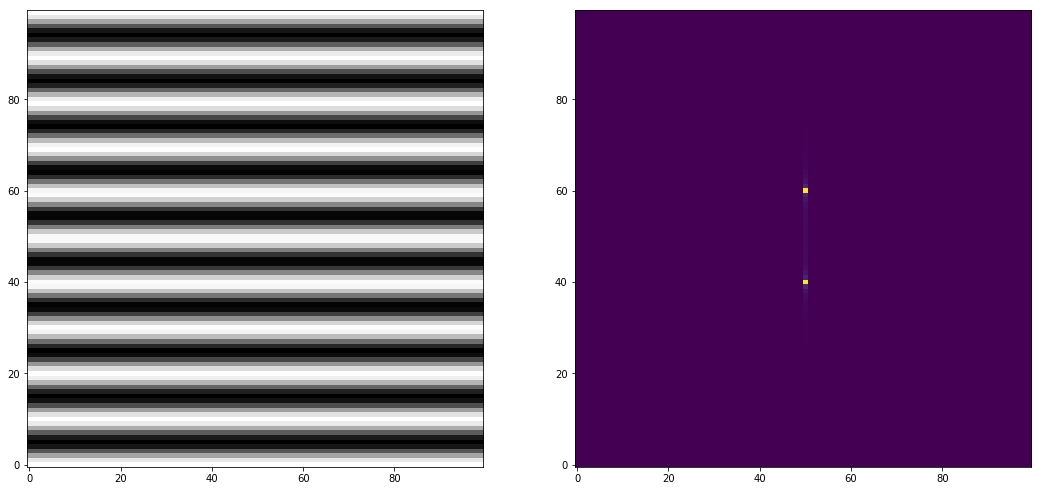

In [4]:
x_vals1 = np.linspace(0,100,100) 
y_vals1 = np.linspace(0,2*np.pi,100) 
x_1,y_1 = np.meshgrid(x_vals1,y_vals1)
V1 = np.cos(10*y_1)

fig = plt.figure(figsize=(18,12))
plt.subplot(121)
plt.imshow(V1,cmap="gray",origin="lower",animated=True)

plt.subplot(122)
a1 = np.fft.fftn(V1)
a_1 = np.fft.fftshift(a1)
plt.imshow(abs(a_1),origin="lower")
plt.show()

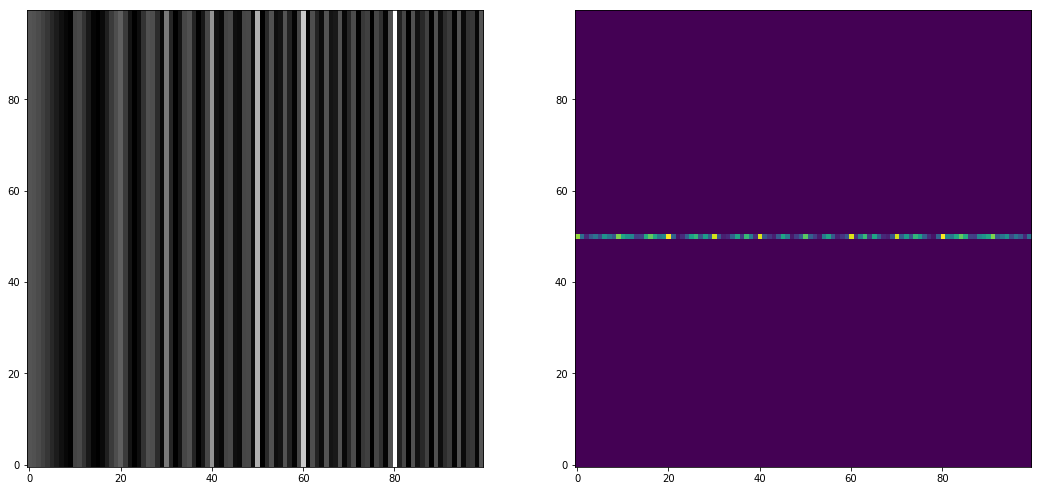

In [5]:

x_vals2 = np.linspace(0,2*np.pi,100)
x_vals2[:10]= [np.cos(5*x_val) for x_val in x_vals2[:10]]
x_vals2[11:20] = [np.cos(10*x_val) for x_val in x_vals2[11:20]]
x_vals2[21:30] = [np.cos(15*x_val) for x_val in x_vals2[21:30]]
x_vals2[31:40] = [np.cos(20*x_val) for x_val in x_vals2[31:40]]
x_vals2[41:50] = [np.cos(25*x_val) for x_val in x_vals2[41:50]] 
x_vals2[51:60] = [np.cos(30*x_val) for x_val in x_vals2[51:60]]
x_vals2[61:80] = [np.cos(35*x_val) for x_val in x_vals2[61:80]]
x_vals2[81:] = [np.cos(40*x_val) for x_val in x_vals2[81:]]
y_vals2 = (np.linspace(0,100,100))

x_2,y_2 = np.meshgrid(x_vals2,y_vals2)
V2 = x_2


fig = plt.figure(figsize=(18,12))
plt.subplot(121)
im = plt.imshow(V2,cmap="gray",origin="lower",animated=True)

plt.subplot(122)
a2 = np.fft.fft2(V2)
a_2 = np.fft.fftshift(a2)
plt.imshow(abs(a_2),origin="lower")
plt.show()

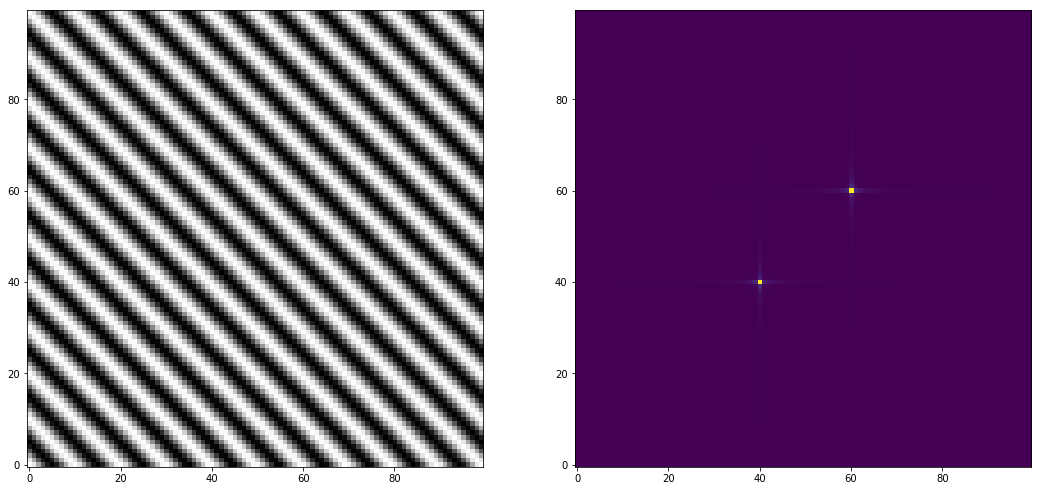

In [6]:
x_vals3 = np.linspace(0,2*np.pi,100) 
y_vals3 = np.linspace(0,2*np.pi,100) 
x_3,y_3 = np.meshgrid(x_vals3,y_vals3)
V3 = np.cos(10*(y_3+x_3))

fig = plt.figure(figsize=(18,12))
plt.subplot(121)
plt.imshow(V3,cmap="gray",origin="lower",animated=True)

plt.subplot(122)
a3 = np.fft.fftn(V3)
a_3 = np.fft.fftshift(a3)
plt.imshow(abs(a_3),origin="lower")
plt.show()

In [7]:
print(V3[50,50])

0.805270257531


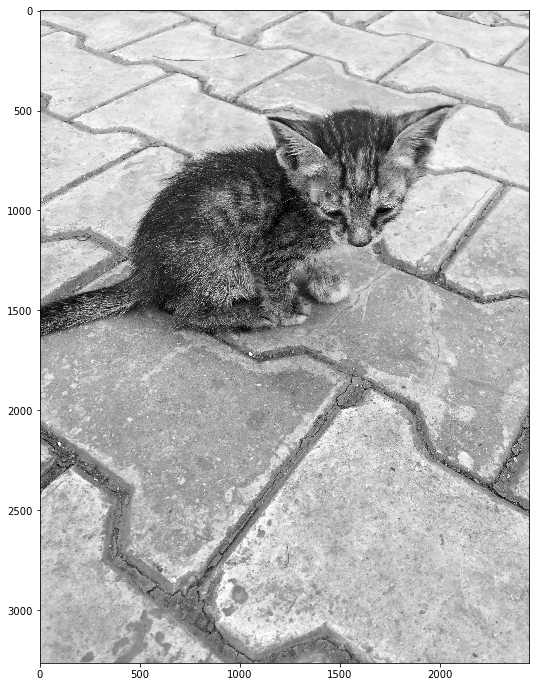

In [8]:
image_2 = ndimage.imread('cat.jpg', flatten=True)     # flatten=True gives a greyscale image

fig = plt.figure(figsize=(18,12))
plt.imshow(image_2,cmap="gray",origin="upper")
plt.show()


(3264, 2448, 3)


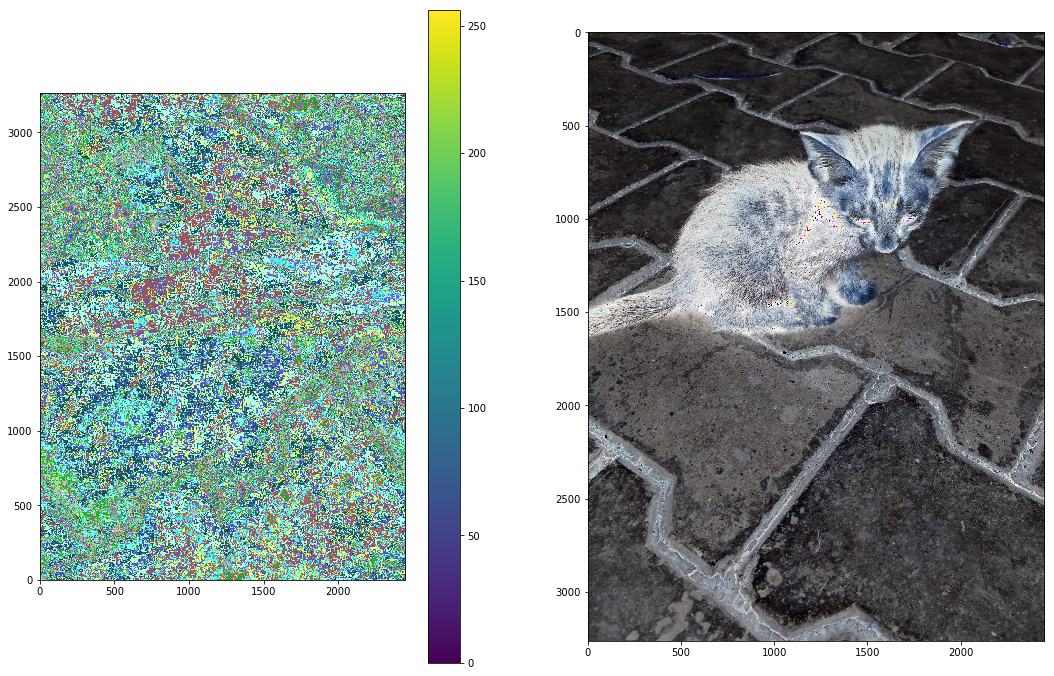

In [21]:
from PIL import Image
import numpy as np
import scipy.fftpack as fp

## Functions to go from image to frequency-image and back
"""
im2freq = lambda data: fp.rfft(fp.rfft(data, axis=0),
                               axis=1)
freq2im = lambda f: fp.irfft(fp.irfft(f, axis=1),
                             axis=0)
"""
def im2freq(data):
    #f = fp.rfft(fp.rfft(data, axis=0),axis=1)
    f = fp.rfft(data)
    fshift = fp.fftshift(f)
    return fshift

def freq2im(f):
    f1 = fp.ifftshift(f)
    #f2 = fp.irfft(fp.irfft(f1, axis=1),axis=0)
    f2 = fp.irfft(f1)
    return f2

remmax = lambda x: x/x.max()
remmin = lambda x: x - np.amin(x, axis=(0,1), keepdims=True)
touint8 = lambda x: (remmax(remmin(x))*(256-1e-4))

#cat_data = np.array(Image.open('cat.jpg'))
cat_data = Image.open('cat.jpg')
cat_pixels = list(cat_data.getdata())
cat_freq_image = im2freq(cat_data)
cat_re_freq = touint8(cat_freq_image)
print(shape(cat_re_freq))
#cat_freq_image = -1*(cat_freq_image - 255)

fig = plt.figure(figsize=(18,12))
plt.subplot(121)
plt.imshow(cat_re_freq,origin="lower")
#plt.xlim(0,500)
#plt.ylim(0,500)
plt.colorbar()

plt.subplot(122)
orig = freq2im(cat_freq_image)
plt.imshow(orig,origin="upper")
plt.show()



In [10]:
print(orig[2500,1800])

[ 217.  218.  213.]


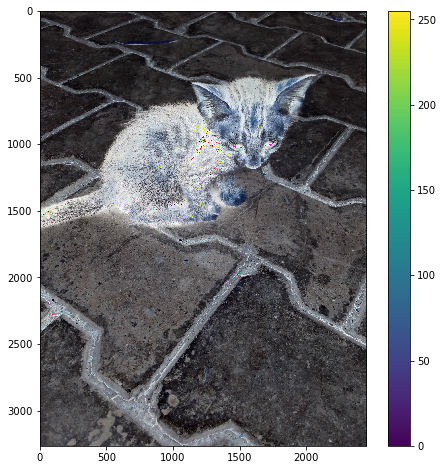

In [11]:
cat_image_freq = freq2im(cat_freq_image)

plt.figure(figsize=(8,8))
plt.imshow(cat_image_freq)
plt.colorbar()
plt.show()

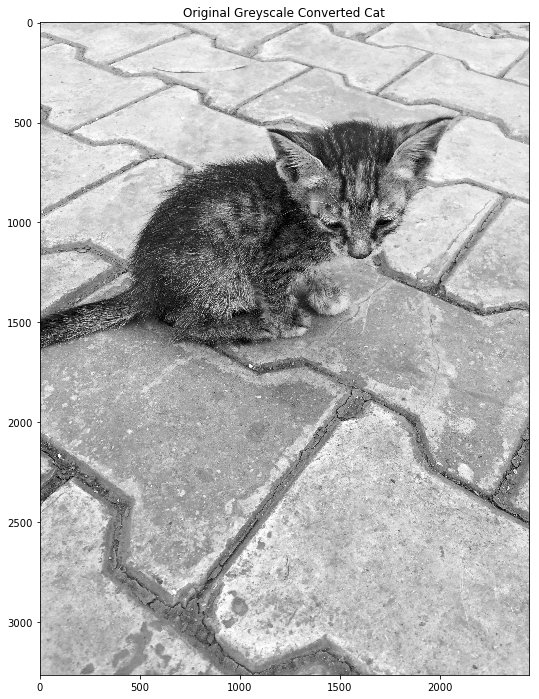

In [12]:
from skimage import color
from skimage import io

#im_cat = color.rgb2gray(io.imread('cat.jpg'))
im_cat = io.imread('cat.jpg', as_grey=True)
#im_cat = Image.open("cat.jpg").convert('LA')
fig = plt.figure(figsize=(18,12))
plt.title('Original Greyscale Converted Cat')
plt.imshow(im_cat,cmap='gray',origin="upper")
plt.show()



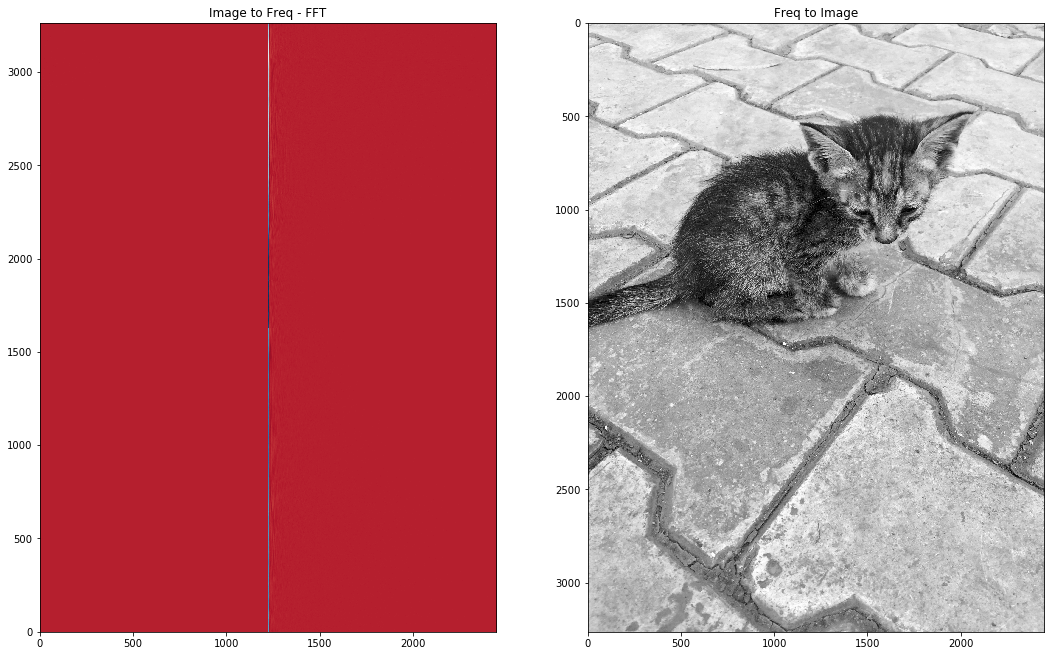

In [22]:
grey_cat_freq_image = im2freq(im_cat)
grey_cat_re_freq = touint8(grey_cat_freq_image)

fig = plt.figure(figsize=(18,12))
plt.subplot(121)
plt.title('Image to Freq - FFT')
plt.imshow(grey_cat_re_freq,cmap='RdBu',origin="lower")
#plt.clim(-10,10)


plt.subplot(122)
plt.title('Freq to Image')
orig_grey_cat = freq2im(grey_cat_freq_image)
plt.imshow(orig_grey_cat,cmap='gray',origin="upper")
plt.show()


## Apply FFT routines to Shadow Band Image

In [15]:
egypt_data = np.array(Image.open('egypt_bands.jpg'))
egypt_fft = np.fft.fftn(egypt_data)
egypt_data = egypt_data+255
egypt_freq = im2freq(egypt_data)
egypt_re_freq = touint8(egypt_freq)



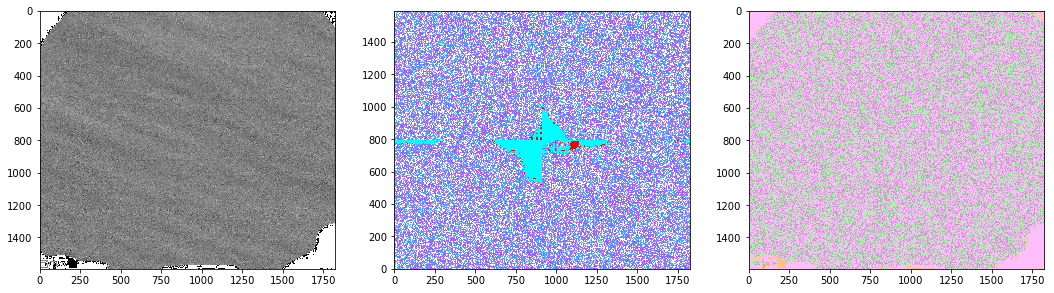

In [16]:
fig = plt.figure(figsize=(18,12))

plt.subplot(131)
plt.imshow(egypt_data)

plt.subplot(132)
#plt.imshow(abs(egypt_fft))
plt.imshow(egypt_re_freq,origin="lower")

plt.subplot(133)
orig_bands = freq2im(egypt_re_freq)
plt.imshow(orig_bands)
plt.show()

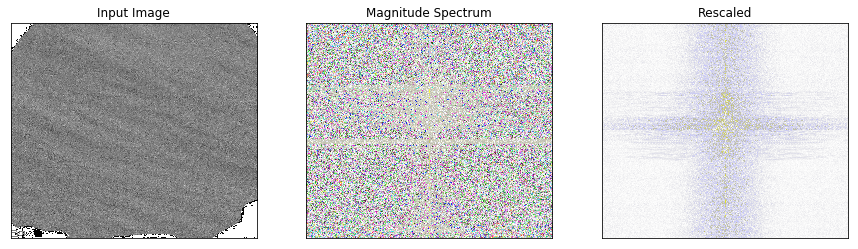

In [17]:
f = np.fft.fft2(egypt_data)
fshift = np.fft.fftshift(f)
egypt_refreq = touint8(abs(fshift))
magnitude_spectrum = 20*np.log(np.abs(fshift))


plt.figure(figsize=(15,8))
plt.subplot(131),plt.imshow(egypt_data, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(egypt_refreq)
plt.title('Rescaled'), plt.xticks([]), plt.yticks([])
plt.show()

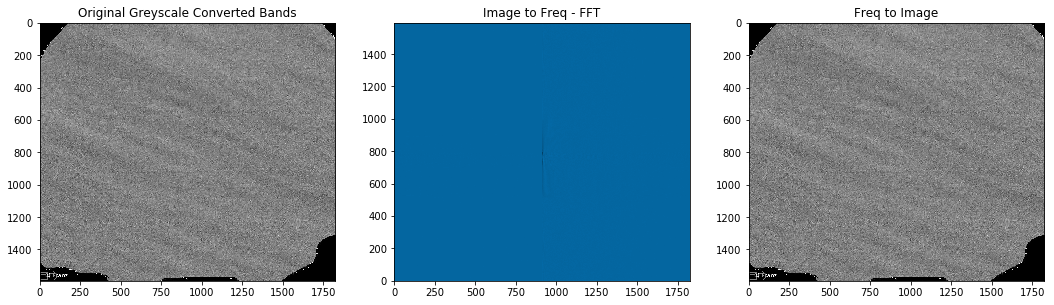

In [30]:
fig = plt.figure(figsize=(18,12))

im_bands = io.imread('egypt_bands.jpg', as_grey=True)
plt.subplot(131)
plt.title('Original Greyscale Converted Bands')
plt.imshow(im_bands,cmap='gray',origin="upper")

grey_band_freq_image = im2freq(im_bands)
grey_band_re_freq = touint8(grey_band_freq_image)


plt.subplot(132)
plt.title('Image to Freq - FFT')
plt.imshow(grey_band_re_freq,cmap='PuBu_r',origin="lower")

plt.subplot(133)
plt.title('Freq to Image')
orig_grey_bands = freq2im(grey_band_freq_image)
plt.imshow(orig_grey_bands,cmap='gray',origin="upper")
plt.show()

/Users/JanviMadhani/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


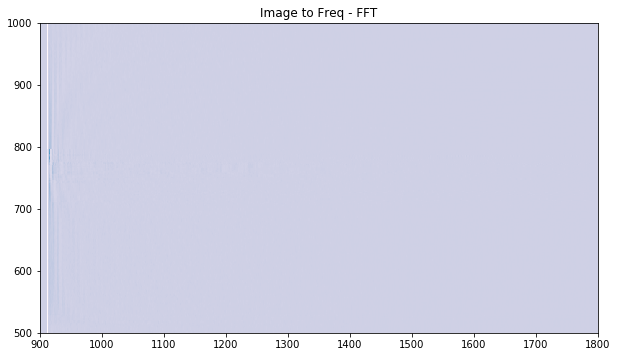

In [29]:
fig = plt.figure(figsize=(10,10))
plt.title('Image to Freq - FFT')
plt.imshow(np.log(grey_band_re_freq),cmap='PuBu_r',origin="lower")
plt.xlim(900,1800)
plt.ylim(500,1000)
plt.show()